# USPS Autoencoder

## imports

In [ ]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## import the dataset

In [ ]:
from sklearn.datasets import fetch_openml

usps = fetch_openml('usps', version=1)

X = usps['data']
y = usps['target']
X=X.to_numpy()
y=y.to_numpy()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:937: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## print one image

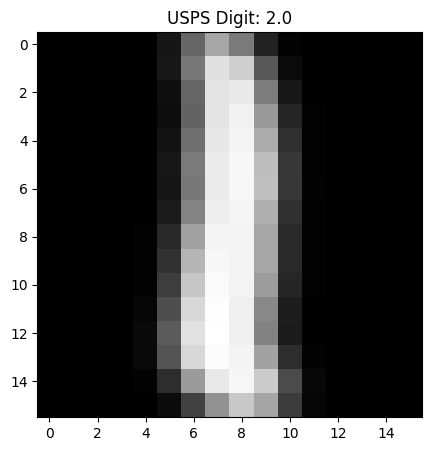

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
# Select an image from the dataset
img_index = 70

# Reshape the flattened image into its original dimensions (16x16)
img = X[img_index].reshape((16,-1))

# Plot the image
plt.imshow(img, cmap='Greys_r')
plt.title('USPS Digit: ' + str(y[img_index]))
plt.show()

## split the dataset & visulatize its shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
len(X_train[0])

256

In [ ]:
train_images = X_train.astype('float32') / 255
test_images = X_test.astype('float32') / 255

In [ ]:
print('Train', train_images.shape, train_labels.shape)
print('Test', test_images.shape, test_labels.shape)

Train (6508, 256) (6508,)
Test (2790, 256) (2790,)


## our autoencoder **model**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

encoding_dim = 64   # dimension of the latent representation
image_size = train_images.shape[1]

# Create input layer. This returns a tensor
inputs = layers.Input(shape=(image_size,), name = 'input_image')

# Create hidden layer
encoded = layers.Dense(encoding_dim,
                       activation='relu',
                       name = 'encoded')(inputs)
                       ## The output of this layer represents the encoding vector

# Create output layer
output_image = layers.Dense(image_size, # Why?
                            activation='linear',
                            name = 'reconstructed')(encoded)

# Create model
model = Model(inputs=inputs, outputs=output_image)


In [ ]:
model.summary()

Model: "model_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 256)]             0         
                                                                 
 encoded (Dense)             (None, 64)                16448     
                                                                 
 reconstructed (Dense)       (None, 256)               16640     
                                                                 
Total params: 33,088
Trainable params: 33,088
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

model.fit(train_images,
          train_images, # train_images are both the inputs and the labels
          epochs=70,
          batch_size=64)

Epoch 1/70
102/102 [==============================] - 1s 4ms/step - loss: 4.3603e-06
Epoch 2/70
102/102 [==============================] - 0s 4ms/step - loss: 4.0295e-06
Epoch 3/70
102/102 [==============================] - 0s 4ms/step - loss: 3.8781e-06
Epoch 4/70
102/102 [==============================] - 0s 4ms/step - loss: 3.6359e-06
Epoch 5/70
102/102 [==============================] - 0s 3ms/step - loss: 3.3648e-06
Epoch 6/70
102/102 [==============================] - 0s 3ms/step - loss: 3.1573e-06
Epoch 7/70
102/102 [==============================] - 0s 3ms/step - loss: 3.0076e-06
Epoch 8/70
102/102 [==============================] - 0s 2ms/step - loss: 2.8897e-06
Epoch 9/70
102/102 [==============================] - 0s 2ms/step - loss: 2.7666e-06
Epoch 10/70
102/102 [==============================] - 0s 3ms/step - loss: 2.6230e-06
Epoch 11/70
102/102 [==============================] - 0s 2ms/step - loss: 2.4757e-06
Epoch 12/70
102/102 [==============================] - 0s 2ms/s

##visulalizing the origninal vs the reconstructed imgs

1/1 [==============================] - 0s 55ms/step


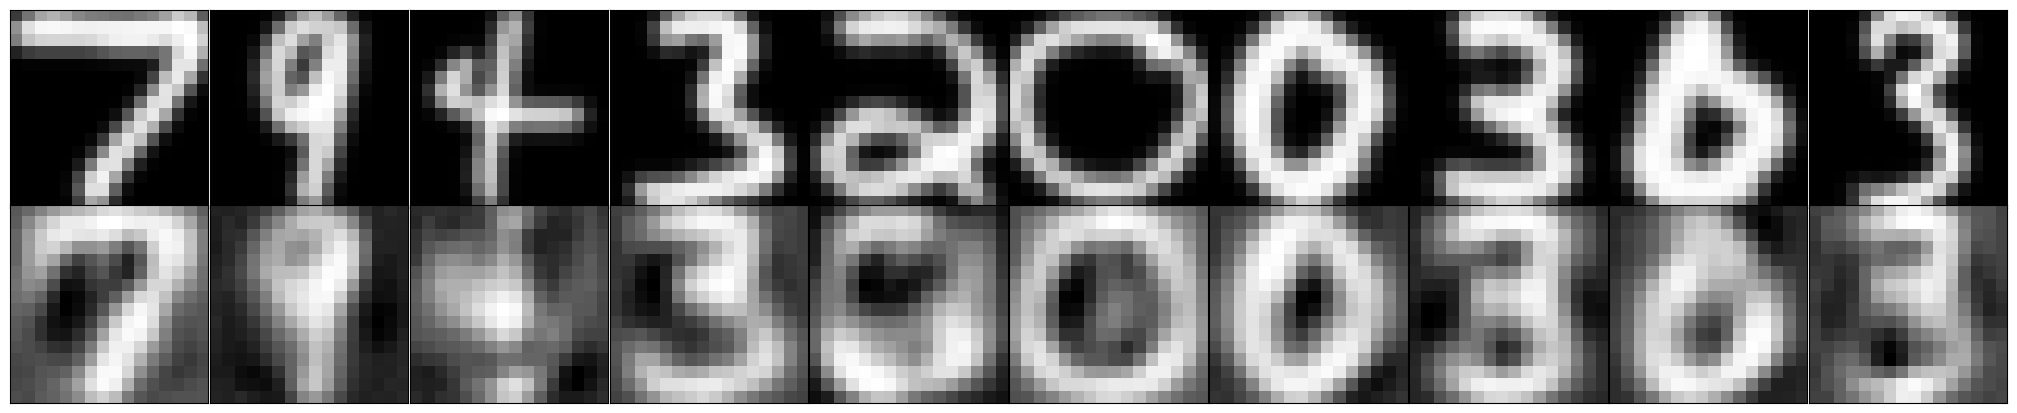

In [ ]:
fig, axes = plt.subplots(nrows=2,
                         ncols=10,
                         sharex=True,
                         sharey=True,
                         figsize=(20,4)
                         )

# Get first few samples of test images
in_imgs = test_images[:10]

# Get model's reconstructions
reconstructed = model.predict(in_imgs)

# Loop over rows of plot
for images, row in zip([in_imgs, reconstructed], axes):
    # Loop over images in each row
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((16, 16)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

##visulalizing the origninal vs the intermediate output form the bottelneck vs the reconstructed imgs

1/1 [==============================] - 0s 53ms/step


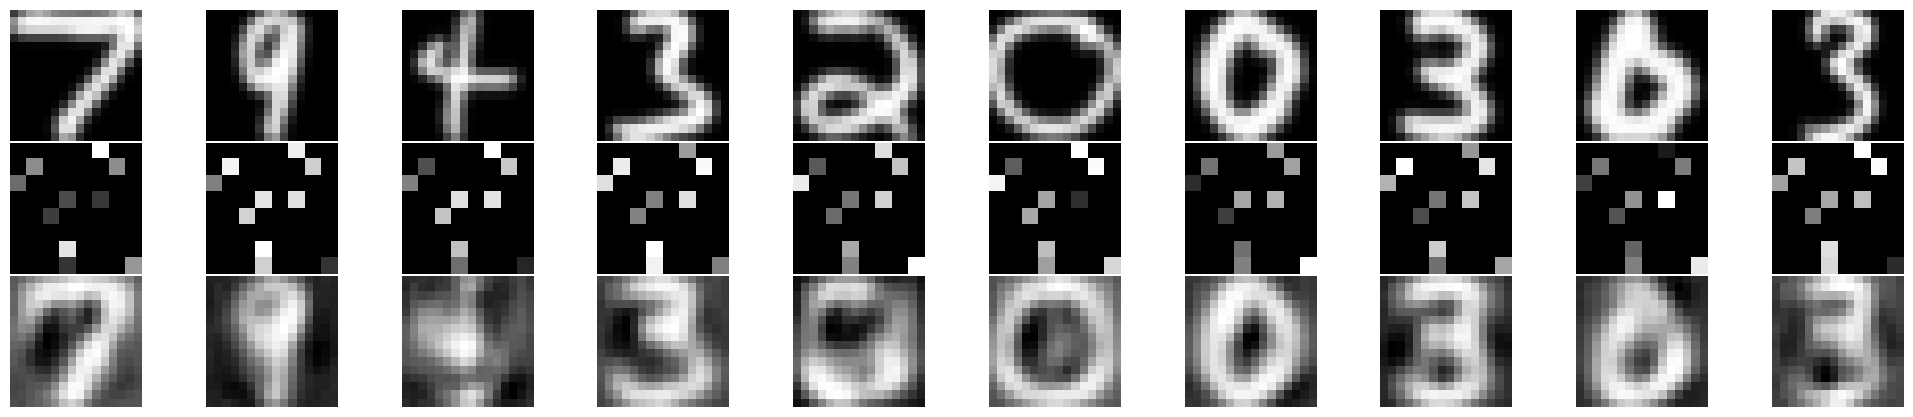

In [ ]:
import keras
from keras.models import Model
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(20,4))

[_.set_axis_off() for _ in axes.flatten()]

layer_name = 'encoded'
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(test_images[:10])

[ax.imshow(img.reshape((8, 8)), cmap='Greys_r') if ax.get_position().y0==axes[1][0].get_position().y0 else ax.imshow(img.reshape((16, 16)), cmap='Greys_r') for img, ax in zip([in_imgs[i].reshape(1,-1) for i in range(in_imgs.shape[0])] + [intermediate_output[i].reshape(1,-1) for i in range(intermediate_output.shape[0])] + [reconstructed[i].reshape(1,-1) for i in range(reconstructed.shape[0])], axes.flatten())];

fig.tight_layout(pad=0.1)

